In [2]:
import tensorflow as tf
import numpy as np


load MNIST dataset

The MNIST database contains 60,000 training images and 10,000 testing images. Therefore, in the second line, I have separated these two groups as train and test and also separated the labels and the images.

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


check one of the image how it's look like

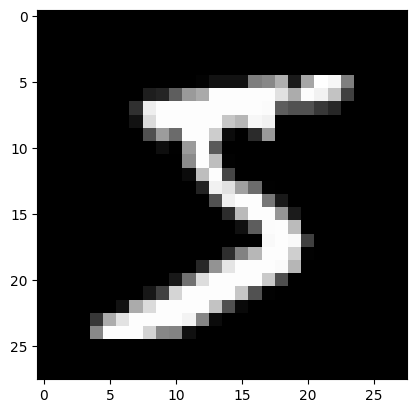

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))


we will create a simple CNN for MNIST that demonstrates how to use all of the aspects of a modern CNN implementation, including Convolutional layers, Pooling layers and Dropout layers.

But 1st of all import required packages.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Next we need reshape dataset, so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height][channels].

In the case of RGB, the last dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [8]:
print(x_train.shape)

(60000, 28, 28, 1)


 we define our neural network model.
 summarization of the network architecture is as follows:
 
1)The first hidden layer is a convolutional layer called a Convolution2D. The layer has 28feature maps, which with the size of 3×3 and a rectifier activation function. This is the input layer, expecting images with the structure outlined above [pixels][width][height].

2)Next, we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.

3)Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.

4)The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 30% of neurons in the layer in order to reduce overfitting.

5)Next a fully connected layer with 200 neurons and rectifier activation function. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

As before, the model is trained using logarithmic loss and the ADAM gradient descent algorithm.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [10]:
model = Sequential()
#model.add(Conv2D(28, kernal_size=(3,3), input_shape=(28, 28, 1)))
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation = tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(10,activation = tf.nn.softmax))

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x= x_train , y = y_train , epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 45s 23ms/step - loss: 0.1959 - accuracy: 0.9401
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0814 - accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0575 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0453 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0376 - accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0297 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0255 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0232 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0209 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 41s 22m

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0633 - accuracy: 0.9855


[0.06329010426998138, 0.9854999780654907]